In [ ]:
# Downloading the libraries

In [ ]:
!pip install kaggle
!pip install ultralytics
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 8.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# Importing the libraries

In [ ]:
from google.colab import files
from google.colab.patches import cv2_imshow
from roboflow import Roboflow
import zipfile
from ultralytics import YOLO
import shutil
import os
import cv2
import numpy as np

In [ ]:
# Downloading the dataset

In [ ]:
def download_from_kaggle(dataset_name, kaggle_json_path):
    # Upload Kaggle API token
    uploaded = files.upload()

    # Move Kaggle API token
    !mkdir -p ~/.kaggle
    !cp {kaggle_json_path} ~/.kaggle/
    !chmod 600 ~/.kaggle/kaggle.json

    # Download dataset
    !kaggle datasets download -d {dataset_name}

    # Extract dataset
    with zipfile.ZipFile(f"{dataset_name}.zip", 'r') as zip_ref:
        zip_ref.extractall("dataset")

def download_from_roboflow(workspace, project_name, version_num, roboflow_api_key):
    # Initialize Roboflow client
    rf = Roboflow(api_key=roboflow_api_key)

    # Get project version and download dataset
    project = rf.workspace(workspace).project(project_name)
    version = project.version(version_num)
    dataset = version.download("yolov8")

    return dataset
def move_file(source_path, destination_path):
  shutil.move(source_path, destination_path)

In [ ]:
roboflow_api_key = "/Your/API/Key"


dataset = download_from_roboflow("pamz3ddesigns6-is4mp", "window-and-door-detection", 1, roboflow_api_key)

source_path = "/content/Window-and-Door-Detection-1/data.yaml"
destination_path = "/content/data.yaml"
move_file(source_path, destination_path)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.46, to fix: `pip install ultralytics==8.0.196`


In [ ]:
# Start intializing the Model

In [ ]:
model = YOLO('yolov8m.yaml')
model = YOLO('yolov8m.pt')
model = YOLO('yolov8m.yaml').load('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 254MB/s]


Transferred 475/475 items from pretrained weights


In [ ]:
# Training the model

In [ ]:
results = model.train(data='/content/data.yaml', batch=6, epochs=50, imgsz=640)

Ultralytics YOLOv8.1.46 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/content/data.yaml, epochs=50, time=None, patience=100, batch=6, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

train: Scanning /content/Window-and-Door-Detection-1/train/labels.cache... 168 images, 0 backgrounds, 0 corrupt: 100%|██████████| 168/168 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Window-and-Door-Detection-1/valid/labels.cache... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<?, ?it/s]

Plotting labels to runs/detect/train3/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.000515625), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.183       1.84      1.027        145        640: 100%|██████████| 28/28 [14:32<00:00, 31.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.73s/it]

                   all          5         44      0.204      0.423      0.254      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.202      1.513      1.009        105        640: 100%|██████████| 28/28 [14:19<00:00, 30.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.58s/it]

                   all          5         44      0.416      0.498      0.384      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G       1.23      1.349      1.037         91        640: 100%|██████████| 28/28 [14:05<00:00, 30.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.98s/it]

                   all          5         44      0.884      0.239      0.259      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.313      1.246      1.055         85        640: 100%|██████████| 28/28 [14:03<00:00, 30.13s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.19s/it]

                   all          5         44      0.518      0.459      0.549      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.269      1.259      1.063        128        640: 100%|██████████| 28/28 [14:05<00:00, 30.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.23s/it]

                   all          5         44      0.659       0.35      0.344      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G       1.13      1.057      1.011        133        640: 100%|██████████| 28/28 [13:59<00:00, 29.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.20s/it]

                   all          5         44      0.345      0.628      0.352      0.245



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.187      1.098      1.036         98        640: 100%|██████████| 28/28 [14:00<00:00, 30.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.25s/it]

                   all          5         44      0.433      0.564      0.459      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.123       1.03      1.027         89        640: 100%|██████████| 28/28 [13:57<00:00, 29.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.29s/it]

                   all          5         44      0.867      0.556      0.575      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.171      1.037      1.032        113        640: 100%|██████████| 28/28 [13:56<00:00, 29.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.51s/it]

                   all          5         44      0.346      0.665      0.456      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.084     0.9512      1.009         70        640: 100%|██████████| 28/28 [13:56<00:00, 29.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.94s/it]

                   all          5         44       0.32      0.551      0.358      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.211      1.087      1.033         65        640: 100%|██████████| 28/28 [14:25<00:00, 30.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.74s/it]

                   all          5         44      0.326      0.645      0.394      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.126      1.007      1.014        102        640: 100%|██████████| 28/28 [13:55<00:00, 29.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.07s/it]

                   all          5         44      0.552      0.624      0.523      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G      1.056     0.9126      1.006         77        640: 100%|██████████| 28/28 [13:45<00:00, 29.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.30s/it]

                   all          5         44      0.534      0.543      0.633      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.059     0.8739      0.993         76        640: 100%|██████████| 28/28 [13:48<00:00, 29.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.90s/it]

                   all          5         44      0.713      0.573      0.467      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G     0.9907     0.8375     0.9756        146        640: 100%|██████████| 28/28 [13:49<00:00, 29.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.48s/it]

                   all          5         44      0.636      0.542       0.45      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.003     0.7785     0.9642        113        640:  96%|█████████▋| 27/28 [13:16<00:29, 29.51s/it]

In [ ]:
class YOLODetector:
    def __init__(self, model_path, image_path, model=""):
        self.model_path = model_path
        self.image_path = image_path
        if model == "":
            self.model = self.load_model(model_path)
        else:
            self.model = model

    def load_model(self, weights_path):
        model = YOLO(weights_path)
        return model

    def predict_and_detect(self):
        image = cv2.imread(self.image_path)
        results = self.model.predict(source=self.image_path, conf=0.1)

        num_detections = 0
        self.class_names = []

        for result in results:
            boxes = result.boxes
            for idx, box in enumerate(boxes.xyxy):
                xmin, ymin, xmax, ymax = box[0], box[1], box[2], box[3]
                cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)

                # Get the class label
                class_value = int(boxes.cls[idx])
                class_name = self.model.names.get(int(boxes.cls[idx]), 'Unknown')
                self.class_names.append(class_name)

                # Print the class name on the bounding box
                text = f'{class_name}'
                text_size = cv2.getTextSize(text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)[0]
                cv2.rectangle(image, (int(xmin), int(ymin - text_size[1] - 10)), (int(xmin + text_size[0] + 10), int(ymin)), (0, 255, 0), -1)
                cv2.putText(image, text, (int(xmin + 5), int(ymin - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
                num_detections += 1

        return image

    def display_image(self, image):
        cv2_imshow(image)



image 1/1 /content/Window-and-Door-Detection-1/test/images/008_jpg.rf.6b596961ca155acd2834c082a6a85466.jpg: 384x640 4 Doors, 1 Entrance, 10 Windowss, 207.8ms
Speed: 4.9ms preprocess, 207.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


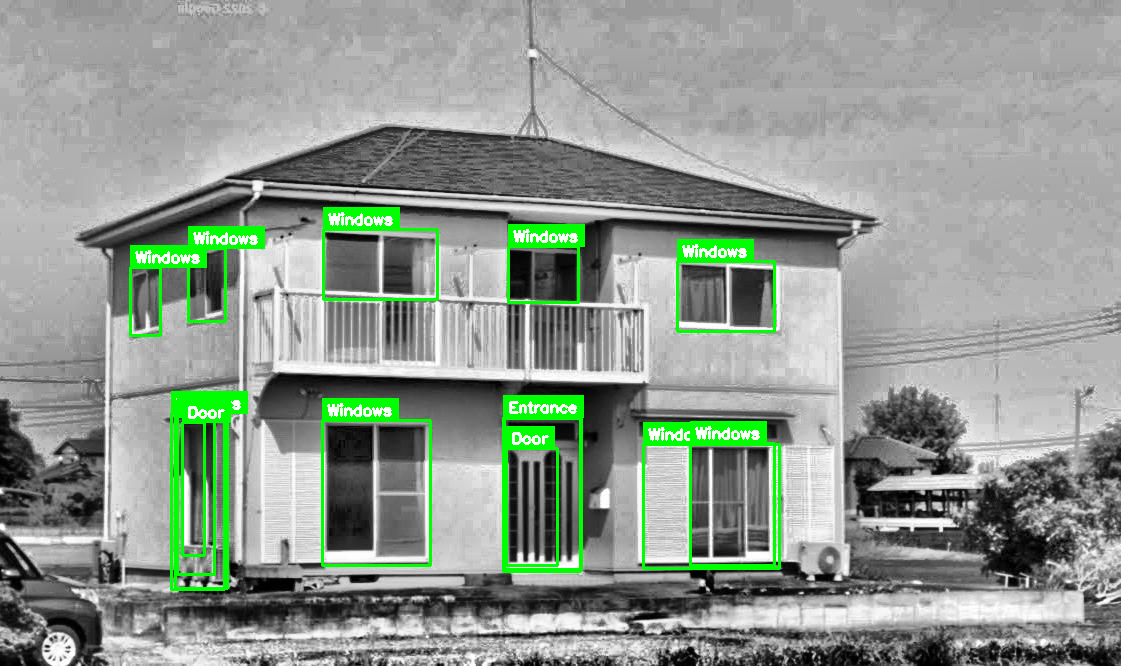

In [ ]:
model_path = '/content/runs/detect/train2/weights/best.pt'
image_path = '/content/Window-and-Door-Detection-1/test/images/008_jpg.rf.6b596961ca155acd2834c082a6a85466.jpg'

detector = YOLODetector(model_path, image_path)

result_image = detector.predict_and_detect()
detector.display_image(result_image)